In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import load_img,img_to_array,to_categorical
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,BatchNormalization,Dropout
from keras.models import Sequential, load_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [ ]:
train_dir='/content/drive/MyDrive/AI/faces'
val_dir='/content/drive/MyDrive/AI/faces'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest',
    brightness_range=[0.8,1.2],
)

val_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical'
)
val_generator=val_datagen.flow_from_directory(
    val_dir,
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical'
)


model=Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])


Found 48 images belonging to 5 classes.
Found 48 images belonging to 5 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 6s/step - accuracy: 0.2257 - loss: 1.5911 - val_accuracy: 0.2083 - val_loss: 1.6142
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.2014 - loss: 1.7259 - val_accuracy: 0.3333 - val_loss: 1.5692
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.1597 - loss: 1.6718 - val_accuracy: 0.3750 - val_loss: 1.5863
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 3s/step - accuracy: 0.3681 - loss: 1.5852 - val_accuracy: 0.4583 - val_loss: 1.5785
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.2743 - loss: 1.5793 - val_accuracy: 0.4792 - val_loss: 1.5630
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.2535 - loss: 1.5918 - val_accuracy: 0.3958 - val_loss: 1.5477
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3958 - loss: 1.5406 - val_accuracy: 0.3958 - val_loss: 1.5128
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.3160 - loss: 1.5432 - val_accuracy: 0.3750 - val_loss: 1.4651
Epoch 9/50
2/2

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

train_emotion = '/content/drive/MyDrive/AI/emotion'
val_emotion ='/content/drive/MyDrive/AI/emotion'
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest',
    brightness_range=[0.5,1.0],
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator_emotion = train_datagen.flow_from_directory(
    train_emotion,
    target_size=(96,96),
    batch_size=10,
    class_mode='categorical'
)

val_generator_emotion = val_datagen.flow_from_directory(
    val_emotion,
    target_size=(96,96),
    batch_size=10,
    class_mode='categorical'
)


model_emotion = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.7),
    Dense(train_generator_emotion.num_classes, activation='softmax')
])

model_emotion.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

Found 100 images belonging to 10 classes.
Found 100 images belonging to 10 classes.


In [ ]:
history = model_emotion.fit(
    train_generator_emotion,
    steps_per_epoch=len(train_generator_emotion),
    epochs=100,
    validation_data=val_generator_emotion,
    validation_steps=len(val_generator_emotion),
    callbacks=[early_stop]
)


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.1196 - loss: 8.6190 - val_accuracy: 0.1100 - val_loss: 2.5271
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 163ms/step - accuracy: 0.1771 - loss: 12.7578 - val_accuracy: 0.1000 - val_loss: 2.8587
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 270ms/step - accuracy: 0.2789 - loss: 12.5456 - val_accuracy: 0.1300 - val_loss: 3.9401
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - accuracy: 0.3041 - loss: 10.4274 - val_accuracy: 0.0600 - val_loss: 4.5505
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step - accuracy: 0.2358 - loss: 12.6551 - val_accuracy: 0.1200 - val_loss: 3.9783
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 233ms/step - accuracy: 0.1976 - loss: 10.5363 - val_accuracy: 0.0900 - val_loss: 6.0502
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - accuracy: 0.1220 - loss: 11.6178 - val_accuracy: 0.1000 - val_loss: 9.0070
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 259ms/step - accuracy: 0.1718 - loss: 9.5749 - val

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Text(0.5, 1.0, ' Tô Minh Thư feels Anxious')

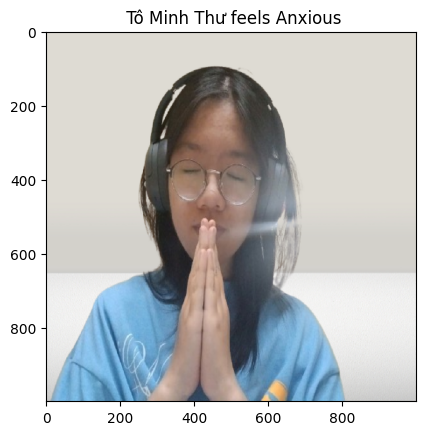

In [ ]:
img = load_img('/content/z6519424342052_3730f66257abbefc6f9c51dbfce4981e-removebg-preview.png', target_size=(1000, 1000))
plt.imshow(img),

img = img.resize((96, 96))
img_array = img_to_array(img) / 255.0
img_array = img_array.reshape(1, 96, 96, 3)

prediction_emotion = model_emotion.predict(img_array)
class_names = list(train_generator_emotion.class_indices.keys())
predicted_class_emotion = class_names[np.argmax(prediction_emotion)]

img_face = img.resize((64, 64))
img_array_face = img_to_array(img_face) / 255.0
img_array_face = img_array_face.reshape(1, 64, 64, 3)
prediction = model.predict(img_array_face)
class_names_face = list(train_generator.class_indices.keys())
predicted_class_face = class_names_face[np.argmax(prediction)]


plt.title(f' {predicted_class_face} feels {predicted_class_emotion}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Text(0.5, 1.0, ' Hoàng Châu Gia Hân feels Angry')

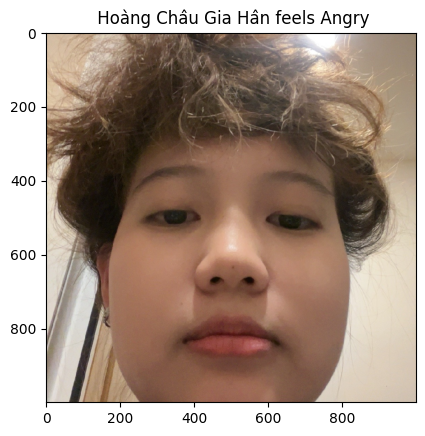

In [ ]:
k,

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Text(0.5, 1.0, ' Nguyễn Thị Minh Phúc feels Angry')

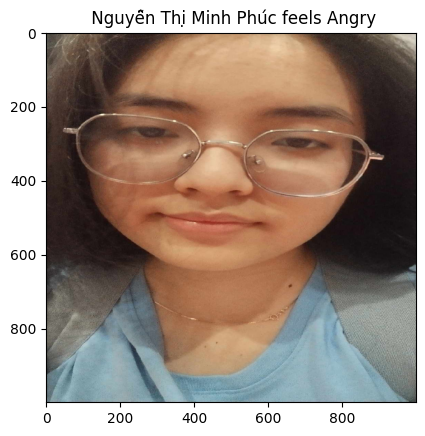

In [ ]:
img = load_img('/content/6.jpg', target_size=(1000, 1000))
plt.imshow(img),

img = img.resize((96, 96))
img_array = img_to_array(img) / 255.0
img_array = img_array.reshape(1, 96, 96, 3)

prediction_emotion = model_emotion.predict(img_array)
class_names = list(train_generator_emotion.class_indices.keys())
predicted_class_emotion = class_names[np.argmax(prediction_emotion)]

img_face = img.resize((64, 64))
img_array_face = img_to_array(img_face) / 255.0
img_array_face = img_array_face.reshape(1, 64, 64, 3)
prediction = model.predict(img_array_face)
class_names_face = list(train_generator.class_indices.keys())
predicted_class_face = class_names_face[np.argmax(prediction)]


plt.title(f' {predicted_class_face} feels {predicted_class_emotion}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Text(0.5, 1.0, ' Nguyễn Thị Ngọc Mai feels Angry')

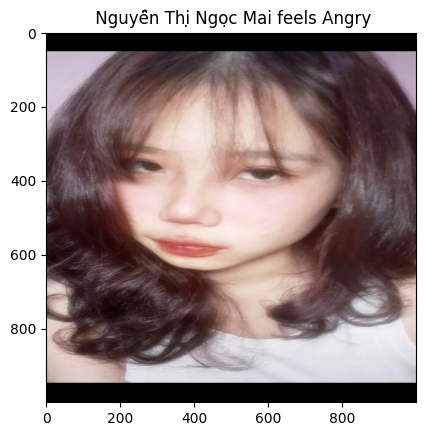

In [ ]:
img = load_img('/content/7.jpg', target_size=(1000, 1000))
plt.imshow(img),

img = img.resize((96, 96))
img_array = img_to_array(img) / 255.0
img_array = img_array.reshape(1, 96, 96, 3)

prediction_emotion = model_emotion.predict(img_array)
class_names = list(train_generator_emotion.class_indices.keys())
predicted_class_emotion = class_names[np.argmax(prediction_emotion)]

img_face = img.resize((64, 64))
img_array_face = img_to_array(img_face) / 255.0
img_array_face = img_array_face.reshape(1, 64, 64, 3)
prediction = model.predict(img_array_face)
class_names_face = list(train_generator.class_indices.keys())
predicted_class_face = class_names_face[np.argmax(prediction)]


plt.title(f' {predicted_class_face} feels {predicted_class_emotion}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Text(0.5, 1.0, ' Đỗ Thị Mỹ Trâm feels Happy')

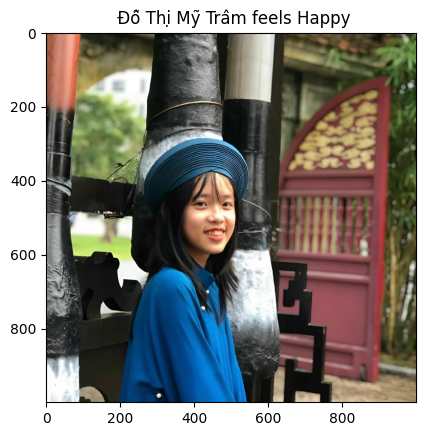

In [ ]:
img = load_img('/content/1.jpg', target_size=(1000, 1000))
plt.imshow(img),

img = img.resize((96, 96))
img_array = img_to_array(img) / 255.0
img_array = img_array.reshape(1, 96, 96, 3)

prediction_emotion = model_emotion.predict(img_array)
class_names = list(train_generator_emotion.class_indices.keys())
predicted_class_emotion = class_names[np.argmax(prediction_emotion)]

img_face = img.resize((64, 64))
img_array_face = img_to_array(img_face) / 255.0
img_array_face = img_array_face.reshape(1, 64, 64, 3)
prediction = model.predict(img_array_face)
class_names_face = list(train_generator.class_indices.keys())
predicted_class_face = class_names_face[np.argmax(prediction)]


plt.title(f' {predicted_class_face} feels {predicted_class_emotion}')